## Example: Decision Tree on the Iris Dataset

Now, let's follow the above pipeline to do a simple data mining task using the iris dataset.

### Step 0: Understand the data and task (concept)

We are aiming to train a classification model on the iris dataset for inferencing the type of an iris using a decision tree. Please be aware that in academic courses, your professor or tutor typically provides specific instructions for this step. Consequently, you may forget this phase in your first several projects, potentially negatively impacting your development process.

### Step 1: Data collection (and storage)

The iris dataset is a built-in dataset in the `scikit-learn` package, so we could directly load it and check its related information.

In [3]:
from sklearn import datasets

irisRaw = datasets.load_iris()
print(irisRaw.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

### Step 2: Data preparation (preprocessing)

In general, for proper data preprocessing steps, we can first explore the dataset.

# data points: 150
# data targets: 150
data classes: ['setosa' 'versicolor' 'virginica']


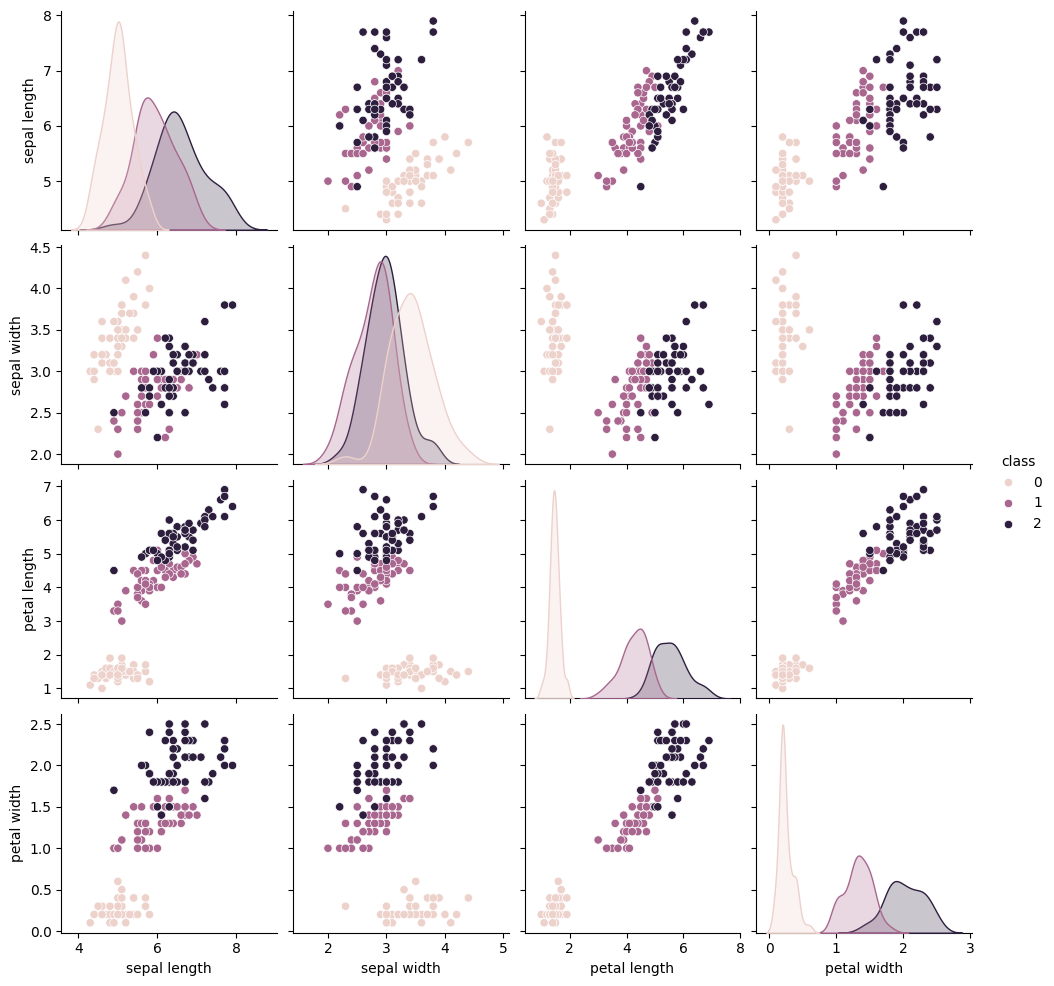

In [4]:
import pandas
import seaborn
# iris.data, iris.target, target_names
print("# data points: %d" % len(irisRaw.data))
print("# data targets: %d" % len(irisRaw.target))
print("data classes:", irisRaw.target_names)

# pandas.DataFrame is a popular data structure in DM
irisDF = pandas.DataFrame(irisRaw.data, columns=['sepal length', 'sepal width', 'petal length', 'petal width'])
irisDF['class'] = irisRaw.target
# seaborn.pairplot provides pairwise relationships in a dataset, easily showing the distribution of each class w.r.t. features.
seaborn.pairplot(irisDF, hue='class')

The distribution of each class (0: setosa, 1: versicolor, 2: virginica) does not largely overlapped with each other, which means the iris dataset is easy to be classified, thus a trivial classification algorithm would work well. In this example, we use a decision tree. Note that there are many more insights which you may extract from this data. For different datasets, different data exploration steps should be applied.

Next, we can split the data into two parts for training and testing, respectively.

In [5]:
from sklearn.model_selection import train_test_split

trX, teX, trY, teY = train_test_split(irisRaw.data, irisRaw.target, test_size=0.3)  # 70% data for training, 30% data for testing
assert(len(trX) == len(trY))
assert(len(teX) == len(teY))
print("# data points for training:", len(trX))
print("# data points for training:", len(teX))

# data points for training: 105
# data points for training: 45


### Step 3: Applying data mining algorithms

We initialize a decision tree and let it fit the traing dataset.

In [6]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(max_depth=5, min_samples_leaf=5)
dtc.fit(trX, trY)

,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.",'gini'
,"splitter splitter: {""best"", ""random""}, default=""best""The strategy used to choose the split at each node. Supportedstrategies are ""best"" to choose the best split and ""random"" to choosethe best random split.",'best'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",5
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",5
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: int, float or {""sqrt"", ""log2""}, default=NoneThe number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... note:: The search for a split does not stop until at least one valid partition of the node samples is found, even if it requires to effectively inspect more than ``max_features`` features.",None
,"random_state random_state: int, RandomState instance or None, default=NoneControls the randomness of the estimator. The features are alwaysrandomly permuted at each split, even if ``splitter`` is set to``""best""``. When ``max_features < n_features``, the algorithm willselect ``max_features`` at random at each split before finding the bestsplit among them. But the best found split may vary across differentruns, even if ``max_features=n_features``. That is the case, if theimprovement of the criterion is identical for several splits and onesplit has to be selected at random. To obtain a deterministic behaviourduring fitting, ``random_state`` has to be fixed to an integer.See :term:`Glossary ` for details.",None
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow a tree with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current 

Visualize the decision tree.

In [9]:
# This only works, when graphviz executables can be found. install graphviz if you want to use this.
import pydotplus

from IPython.display import Image
from sklearn.tree import export_graphviz

graph = pydotplus.graph_from_dot_data(export_graphviz(dtc, out_file=None, feature_names=['sepal length', 'sepal width', 'petal length', 'petal width']))
Image(graph.create_png())

InvocationException: GraphViz's executables not found

In each block, 

- The first line is the condition for deciding the class given an iris measurement.
- `gini` means Gini index or impurity, measuring the probability of a particular variable being wrongly classified when it is randomly chosen.
- `sample` means the number of data points. For example, at the root node, `samples=105`, because there are 105 data points for training.
- `value` means how many data points are classified to the corresponding class.

The figure of the decision tree trained by the iris dataset (for training) clearly shows how to classify an iris flower.

### Step 4: Evaluation

Now we check the performances of this trained decision tree.

In [6]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# get estimation from the trained model (dtc)
trYPred = dtc.predict(trX)
teYPred = dtc.predict(teX)
# obtain accuracy
print('Accuracy of Decision Tree (Train): ', accuracy_score(trYPred, trY))
print('Accuracy of Decision Tree (Test):  ', accuracy_score(teYPred, teY))
# obtain other criteria
print(classification_report(teYPred, teY))

Accuracy of Decision Tree (Train):  0.9714285714285714
Accuracy of Decision Tree (Test):   0.9777777777777777
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.93      0.97        15
           2       0.95      1.00      0.98        20

    accuracy                           0.98        45
   macro avg       0.98      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Precision, recall and F1-score are helpful criteria for a classification task. Specifically,

- recall (sensitivity): the ability of a model to capture all the relevant instances of the positive class among all the actual positive instances.
$$
recall = \frac{TP}{TP + FN},
$$
    where TP is the number of true positives and FN is the number of false negatives. A high recall indicates that the model is effective at identifying a large proportion of actual positive instances. However, it may result in more false positives.

- precision: assesses the accuracy of the model when it predicts the positive class. It measures the proportion of true positive predictions among all the instances predicted as positive.
$$        
Precision = \frac{TP}{TP + FP},
$$
where TP is the number of true positives and FP is the number of false positives. A high precision indicates that the model is making positive predictions with a high degree of accuracy. However, it may miss some positive instances.

- F1 Score: the harmonic mean of precision and recall. It provides a balanced measure that considers both FP and FN.
$$        
F1-score = \frac{2 * precision * recall}{precision + recall}
$$
The F1 score is particularly useful when there is an uneven class distribution or when both false positives and false negatives are important. It ranges between 0 and 1, where a higher score indicates **better overall performance**.

These metrics are crucial in scenarios where the consequences of false positives and false negatives differ, and a trade-off needs to be considered in model development and evaluation.

### Step 5: Deployment

We can re-use this model for any iris flower with its four measurements (sepal length, sepal width, petal length, and petal width). You can save this model to a file and reload the model file to the machine for inference. You may notice that this model is very small and easy to compute. What should we do if the model is huge and too heavy for your target machine for inference (such as mobile phones, FPGAs, etc.)?

The iris dataset is comparatively very small considering real-world datasets for models in production. Datasets play a role like teachers for models. Models then will learn from datasets for fitting them better and better statistically. Then, when a new data point comes, a well-trained model have already learnt the distribution of inputs, thus would be capable to provide the corresponding reasonable estimation (in this case, the estimation is the type of the iris). However, for a new data point that is largely out of the distribution of the training dataset, it is hard for a trained model to provide reliable estimation, as the trained model is only suitable for the distribution of the training dataset. This is also the reason why big data plays an important role in data mining, as it makes sure that rules learnt by the model are likely statistically significant.

## Challenges

Data mining is a powerful and exciting field that can help us gain new knowledge and insights from data. However, data mining also comes with some challenges and limitations. For example:

- Data quality: The quality of the data affects the quality of the results. If the data is incomplete, inaccurate, or biased, then the results may be misleading or unreliable.

- Data privacy: The privacy of the data subjects should be respected and protected. Data mining should not violate the rights or interests of the individuals or groups whose data is being analyzed.

- Data ethics: The ethics of the data analysis should be considered and followed. Data mining should not be used for harmful or malicious purposes.
Data mining is a fascinating and useful process that can help us learn from data and make better decisions.